Using TensorFlow backend.


[[135. 190. 229. ... -83. -51.   4.]
 [386. 382. 356. ... 143. 129.   1.]
 [-32. -39. -47. ... -35. -36.   5.]
 ...
 [ 14.   6. -13. ...  -1.  -8.   5.]
 [-40. -25.  -9. ...  59.  55.   3.]
 [ 29.  41.  57. ...   2.  20.   4.]]
[[ 0.10743338  0.14221346  0.16874292 ... -0.12877583 -0.05021368
   0.5       ]
 [ 0.24824684  0.25035201  0.24065685 ... -0.00900901  0.04594017
  -1.        ]
 [ 0.01374474  0.01323571  0.01245753 ... -0.10333863 -0.04220085
   1.        ]
 ...
 [ 0.03955119  0.03858068  0.03171008 ... -0.08532061 -0.02724359
   1.        ]
 [ 0.00925666  0.02112081  0.03397508 ... -0.05352411  0.00641026
   0.        ]
 [ 0.04796634  0.05829344  0.07134768 ... -0.08373079 -0.01228632
   0.5       ]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 168, 60)           660       
_________________________________________________________________
conv1d_2 (Conv1D

8308/8308 [==============================] - 1s 142us/step - loss: 0.3395 - acc: 0.8707 - val_loss: 0.3393 - val_acc: 0.8596
Epoch 39/74
8308/8308 [==============================] - 1s 141us/step - loss: 0.3411 - acc: 0.8633 - val_loss: 0.3149 - val_acc: 0.8848
Epoch 40/74
8308/8308 [==============================] - 1s 140us/step - loss: 0.3128 - acc: 0.8747 - val_loss: 0.2979 - val_acc: 0.8834
Epoch 41/74
8308/8308 [==============================] - 1s 140us/step - loss: 0.2918 - acc: 0.8877 - val_loss: 0.2888 - val_acc: 0.8978
Epoch 42/74
8308/8308 [==============================] - 1s 141us/step - loss: 0.2765 - acc: 0.8930 - val_loss: 0.2970 - val_acc: 0.8882
Epoch 43/74
8308/8308 [==============================] - 1s 141us/step - loss: 0.2673 - acc: 0.8941 - val_loss: 0.2749 - val_acc: 0.9025
Epoch 44/74
8308/8308 [==============================] - 1s 140us/step - loss: 0.3104 - acc: 0.8710 - val_loss: 0.3329 - val_acc: 0.8759
Epoch 45/74
8308/8308 [==============================

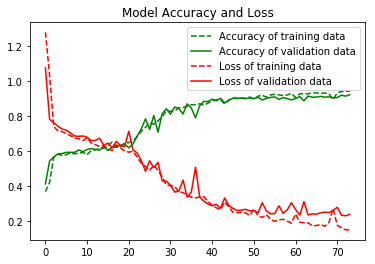

In [1]:
import sys
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from numpy.random import seed
from tensorflow import set_random_seed
import scipy as sp
import scipy.io as spio
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
%matplotlib inline
from tensorflow.python import keras
from sklearn.model_selection import train_test_split ,KFold
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv1D, Dropout, MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import np_utils
from keras.layers import LeakyReLU

from numpy import mean
from numpy import std
import pandas as pd
from scipy import stats
from scipy.stats import zscore
from scipy import stats
from sklearn import metrics
import keras.backend as k
import seaborn as sns
from sklearn import preprocessing
from numpy import mean
from numpy import std

from scipy import stats
from scipy.stats import zscore
from keras.constraints import max_norm
from sklearn.preprocessing import MinMaxScaler
from keras.layers.normalization import BatchNormalization

dataset = np.loadtxt("datalast.csv",delimiter=",")
print(dataset)

dataset= stats.zscore(dataset)
scaler = MinMaxScaler(feature_range=(-1,1))
dataset = scaler.fit_transform(dataset)
print(dataset)



X = dataset[:,0:177]
y = dataset[:,178]
"""
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(177,1)))
model.add(Conv1D(32, kernel_size=3 , activation='relu',padding='same'))
model.add(MaxPooling1D(2,strides=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(64, kernel_size= 3, activation='relu'))
#model.add (BatchNormalization())
model.add(MaxPooling1D(pool_size=2,strides=2))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.15))
model.add(Dense(5, activation='softmax'))
"""
"""
model= Sequential()
model.add(Conv1D(4, 6, strides=1,input_shape=(177,1)))
model.add(Conv1D(4, 6, strides=1, padding='same'))
model.add(MaxPooling1D(4, strides=2))
model.add(Conv1D(4, 5, strides=1, padding='same'))
model.add(Conv1D(4, 5, strides=1, padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(4, strides=2))
#model.add(Dropout(0.15))

model.add(Conv1D(10, 4,strides=1 , padding='same'))
#model.add(Conv1D(10, 4,strides=1 , padding='same'))

model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(10, strides=2))
#model.add(Dropout(0.15))


model.add(Conv1D(10, 4, strides=1 , padding='same'))
#model.add(Conv1D(10, 4, strides=1 , padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(10, strides=2))
#model.add(Dropout(0.15))

model.add(Conv1D(15, 4, strides=1 , padding='same'))
#model.add(Conv1D(15, 4, strides=1 , padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(15, strides=2 , padding='same'))
#model.add(Dropout(0.15))

model.add(GlobalAveragePooling1D())
model.add(Dropout(0.15))
model.add(Dense (50))
model.add(Dense (20))
model.add(Dense (5,activation='softmax'))
print(model.summary())
"""

"""
model = Sequential()
model.add(Conv1D(10, 10, activation='relu', input_shape=(177,1), kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
model.add(Conv1D(10, 10, activation='relu', kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
#model.add(Conv2D(32, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.15))
model.add(Conv1D(60, 10, activation='relu', kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
model.add(Conv1D(60, 10, activation='relu', kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.15))
model.add(Conv1D(50, 5, activation='relu', kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.15))
model.add(Dense(5, activation='softmax', kernel_constraint=max_norm(2), bias_constraint=max_norm(2)))
"""

model = Sequential()
model.add(Conv1D(60, 10, activation='relu', input_shape=(177,1)))
model.add(Conv1D(60, 10, activation='relu'))
model.add(Conv1D(60, 10, activation='relu',   padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))
model.add(Conv1D(100, 10, activation='relu'))
model.add(Conv1D(100, 10, activation='relu'))
model.add(Conv1D(100, 10, activation='relu' , padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))
model.add(Conv1D(50, 5, activation='relu'))
model.add(GlobalAveragePooling1D())
#model.add(Flatten())

model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax' , ))
print(model.summary())

# The EarlyStopping callback monitors training accuracy:
# if it fails to improve for two consecutive epochs,
# training stops early

"""
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]
"""



cvscores = []


scores = list()
# summarize scores
#def summarize_results(scores):
#  m, s = mean(scores), std(scores)
 #print('Accuracy: %.3f%%(+/-%.3f)' % (m ,s) )


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=0)

print("\n--- Reshape data to be accepted by Keras ---\n")
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
y_train = y_train.reshape(y_train.shape[0],1)
y_train_hot = np_utils.to_categorical(y_train-1, 5) # subtracting y_train-1 as keras starts num_Classes index from 0 and we had it from 1 to 5
print(X_train.shape)
print(y_train_hot.shape)



# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
print("\n--- Fit the model ---\n")
history = model.fit(X_train, y_train_hot, batch_size =400, epochs=74 ,
                    #callbacks=callbacks_list,
                    validation_split=0.15, verbose=1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_test = y_test.reshape(y_test.shape[0],1)

y_test_hot = np_utils.to_categorical(y_test-1, 5)

# evaluate the model
print("\n--- evaluate the model ---\n")
score, acc = model.evaluate(X_test, y_test_hot,verbose=1)

print('Test score:', score)
print('Test accuracy:', acc)

#score = model_m.evaluate(x_test_norm, y_test_hot,verbose=1)


print("\n--- Learning curve of model training ---\n")
plt.figure()
plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")

plt.title('Model Accuracy and Loss')
plt.legend()
plt.show()

#cvscores.append(scores * 100)
#print("Avarage accuracy :" , scores )